In [1]:
import pandas as pd

df = pd.read_csv("995K_.csv", dtype={0: str, 1: str})

In [2]:
fake_news_labels = ["fake", "satire", "bias", "conspiracy", "junksci"]
reliable_news_labels = ["reliable", "political", "clickbait"]
omitted_news_labels = ["unreliable", "state", "hate"]

df['label'] = 'unknown'

df.loc[df['type'].isin(fake_news_labels), 'label'] = 'fake'
df.loc[df['type'].isin(reliable_news_labels), 'label'] = 'reliable'

print(df[['type', 'label']])

label_counts = df['label'].value_counts()

print("Label Counts:")
print(label_counts)

              type     label
0        political  reliable
1             fake      fake
2           satire      fake
3         reliable  reliable
4       conspiracy      fake
...            ...       ...
994995  conspiracy      fake
994996   political  reliable
994997     unknown   unknown
994998       rumor   unknown
994999        bias      fake

[995000 rows x 2 columns]
Label Counts:
label
reliable    440494
fake        362629
unknown     191877
Name: count, dtype: int64


In [3]:
total_articles = (label_counts.sum())
distribution = (label_counts / total_articles) * 100

print("Label Distribution:")
print(df['label'].value_counts())

Label Distribution:
label
reliable    440494
fake        362629
unknown     191877
Name: count, dtype: int64


In [4]:
type_counts = df['type'].value_counts()

print(type_counts)

type
reliable                      218564
political                     194518
bias                          133232
fake                          104883
conspiracy                     97314
rumor                          56445
unknown                        43534
unreliable                     35332
clickbait                      27412
junksci                        14040
satire                         13160
hate                            8779
2018-02-10 13:43:39.521661         1
Name: count, dtype: int64


In [5]:
total_articles_type = type_counts.sum()
distribution = (type_counts / total_articles_type) * 100

print("Label Distribution:")
print(distribution)

Label Distribution:
type
reliable                      23.074406
political                     20.535803
bias                          14.065670
fake                          11.072788
conspiracy                    10.273708
rumor                          5.959055
unknown                        4.596005
unreliable                     3.730097
clickbait                      2.893961
junksci                        1.482242
satire                         1.389338
hate                           0.926823
2018-02-10 13:43:39.521661     0.000106
Name: count, dtype: float64


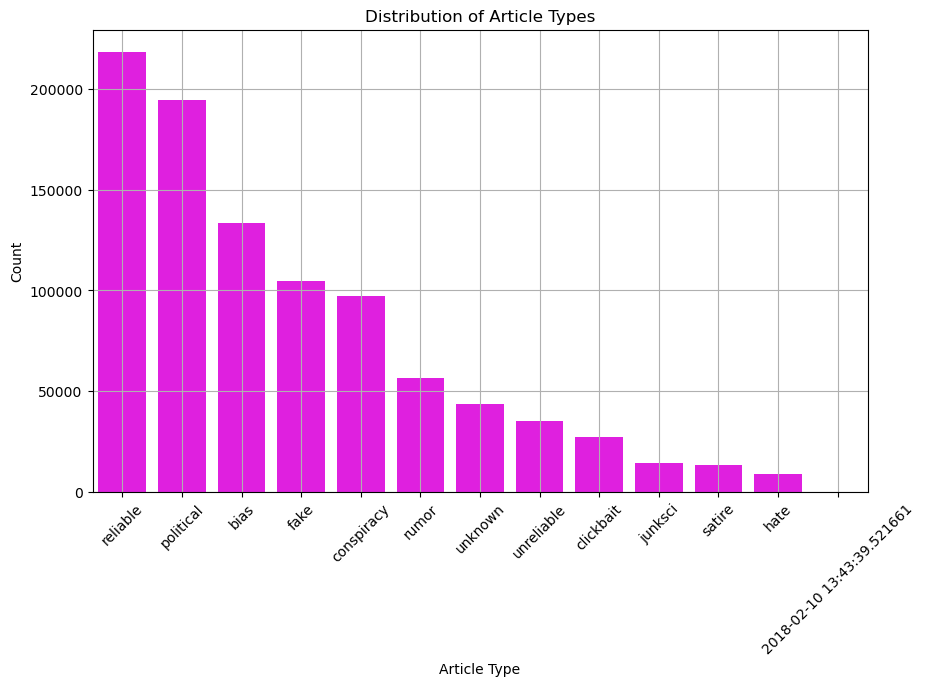

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

type_order = type_counts.index

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', order=type_order, color='fuchsia')

plt.title("Distribution of Article Types")
plt.xlabel("Article Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

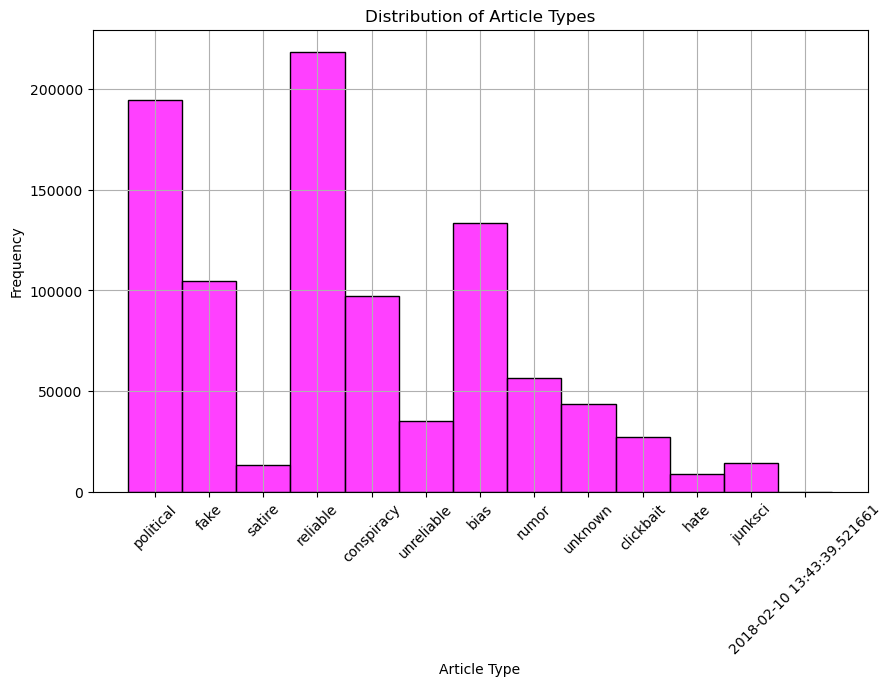

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

type_counts = df['type'].value_counts()

type_order = type_counts.index

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='type', color='fuchsia')
plt.title("Distribution of Article Types")
plt.xlabel("Article Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()